In [11]:
import os 
import numpy as np

data_path=r'C:\Users\Acer\Desktop\Python\Ai with Thakshila\archive\training_set\training_set'

categories=os.listdir(data_path)
print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

['cats', 'dogs']
[0 1]
{'cats': 0, 'dogs': 1}


In [13]:
import cv2

img_size=50

data=[]
target=[]

for category in categories:
    
    category_path=os.path.join(data_path,category)
    #print(img_path)
    img_names=os.listdir(category_path)
    #print(img_names)
    for img_name in img_names:
        img_path=os.path.join(category_path,img_name)
        #print(img_path)
        try:
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(img_size,img_size))

            data.append(img)
            target.append(label_dict[category])
        except Exception as e:
            print(img_path,e)

C:\Users\Acer\Desktop\Python\Ai with Thakshila\archive\training_set\training_set\cats\_DS_Store OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\Users\Acer\Desktop\Python\Ai with Thakshila\archive\training_set\training_set\dogs\_DS_Store OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [14]:
data_new=np.array(data)
target_new=np.array(target)

In [15]:
print(data_new.shape)
print(target_new.shape)

(8005, 50, 50)
(8005,)


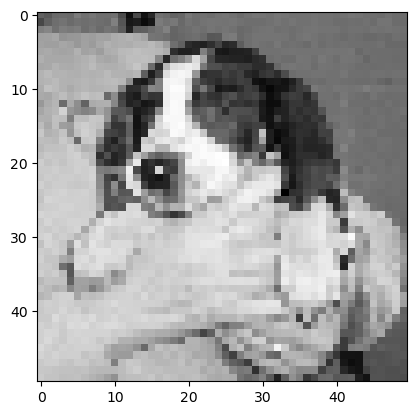

In [21]:
from matplotlib import pyplot as plt

plt.imshow(data[4001],cmap='gray')

In [23]:
target_new[5000]

1

In [24]:
print(data_new.shape)
print(data_new.shape[0],data_new.shape[1],data_new.shape[2])

(8005, 50, 50)
8005 50 50


In [25]:
data_new=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1) # converting to 4D, CNN needs 4D input
print(data_new.shape)

(8005, 50, 50, 1)


In [26]:
data_new=data_new/255 #normalizing/ Scaling

from keras import utils

target_new=utils.to_categorical(target_new)

In [27]:
np.save('data',data_new)
np.save('target',target_new)